In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor

In [4]:
df=pd.read_csv('student performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("Catagories in 'gender' variable ", end="")
print(df['gender'].unique())

print("Catagories in 'race_ethnicity' variable ", end="")
print(df['race_ethnicity'].unique())

print("Catagories in 'parental_level_of_education' variable ", end="")
print(df['parental_level_of_education'].unique())

print("Catagories in 'lunch' variable ", end="")
print(df['lunch'].unique())

print("Catagories in 'test_preparation_course' variable ", end="")
print(df['test_preparation_course'].unique())


Catagories in 'gender' variable ['female' 'male']
Catagories in 'race_ethnicity' variable ['group B' 'group C' 'group A' 'group D' 'group E']
Catagories in 'parental_level_of_education' variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Catagories in 'lunch' variable ['standard' 'free/reduced']
Catagories in 'test_preparation_course' variable ['none' 'completed']


In [6]:
x=df.drop(columns=['math_score'],axis=1)

In [7]:
y=df['math_score']

In [8]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [10]:
### cleate a column transformer with 3 types of transformer 

num_features=x.select_dtypes(exclude="object").columns 
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [11]:
x=preprocessor.fit_transform(x)

In [12]:
x.shape

(1000, 19)

In [13]:
### train he data 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train.shape ,x_test.shape

((800, 19), (200, 19))

In [15]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False) 
    r2 = r2_score(y_true, y_pred) 

    return mae, rmse, r2 

In [16]:
models={
    "Linear Regression" : LinearRegression(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "CatBoost Regressor":CatBoostRegressor(),
    "XGBRF Regressor":XGBRFRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    # make prediction 
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    ### Evaluate train and test dataset 

    model_train_mae , model_train_rmse , model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2_score=evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performence per Traning set')
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2_score))

    print('--------------------------------------------')

    print('Model performence for Test set')
    print('model performence per traning dataset')
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2_score))

    print('='*35)
    print('\n')




Linear Regression
Model performence per Traning set
-Root Mean Squared Error: 5.3274
- Mean Absolute Error: 4.2788
-R2 Score: 0.8797
--------------------------------------------
Model performence for Test set
model performence per traning dataset
-Root Mean Squared Error: 5.4096
- Mean Absolute Error: 4.2259
-R2 Score: 0.8797


K-Neighbors Regressor
Model performence per Traning set
-Root Mean Squared Error: 5.7122
- Mean Absolute Error: 4.5187
-R2 Score: 0.7839
--------------------------------------------
Model performence for Test set
model performence per traning dataset
-Root Mean Squared Error: 7.2516
- Mean Absolute Error: 5.6160
-R2 Score: 0.7839


Lasso
Model performence per Traning set
-Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
-R2 Score: 0.8253
--------------------------------------------
Model performence for Test set
model performence per traning dataset
-Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
-R2 Score: 0.8253


Ridge
Model perfor

###Results


In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model_Name,R2_score


Linear Regression 

In [18]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accurecy of the model is %.2f"%score)

Accurecy of the model is 87.97


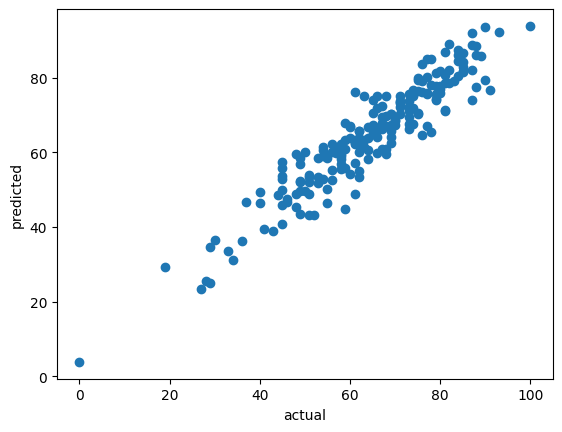

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('actual');
plt.ylabel('predicted');

In [20]:
pred_df=pd.DataFrame({'Actual Value' : y_test, 'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
